In [28]:
import pandas as pd
import pm4py as pm
import os
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery
from pm4py.visualization.footprints import visualizer as fp_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
#os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin\\' Uncomment if you use Windows

In [29]:
 # Leer el archivo Excel
df = pd.read_excel('PTR.xlsx')
print(df.columns)

# Convertir la columna 'Timestamp' al tipo de datos datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filtrar las filas que no contengan la palabra "no
df = df[~df['Timestamp'].astype(str).str.contains('no', case=False)]
# Guardar los cambios en un nuevo archivo o sobrescribir el original
df.to_excel('PTR.xlsx', index=False) 

Index(['NHC', 'Patologia', 'Cirujano', 'Tipo de Protesis', 'Actividad',
       'Timestamp', 'Hora - Formato (Ejemplo: 12:30)',
       'Recursos - Formato (Ejemplo: AntibioticoX;Cama;Habitacion;SalaRayos)',
       'Datos extra', 'Hemoglobina preiq', 'Hemoglobina postiq',
       'Duracion de la intervencion'],
      dtype='object')


In [30]:
file_path_rodilla="PTR.csv"
event_log_rodilla = pd.read_csv(file_path_rodilla,sep=';')
event_log_rodilla
#Este es el log de la vía clínica de rodilla

,NHC,Patologia,Cirujano,Tipo de Protesis,Actividad,Timestamp,Hora - Formato (Ejemplo: 12:30),Recursos - Formato (Ejemplo: AntibioticoX;Cama;Habitacion;SalaRayos),Datos extra,Hemoglobina preiq,Hemoglobina postiq,Duracion de la intervencion
0,410784,Gonartrosis derecha,Cesar Garcia Gutierrez,Persona,Rx preiq,2021-11-08 00:00:00,NaN,"Sala de rayos, personal, material informatico",NaN,"12,8","11,4",90
1,410784,NaN,NaN,NaN,Consentimiento informado,2021-08-23 00:00:00,11:17:00,"Personal, material",NaN,NaN,NaN,NaN
2,410784,NaN,NaN,NaN,Valoracion preanestesica,2023-05-04 00:00:00,NaN,"Personal, material",NaN,NaN,NaN,NaN
3,410784,NaN,NaN,NaN,Comprobacion anestesia ingreso,2023-05-07 00:00:00,NaN,Personal,NaN,NaN,NaN,NaN
4,410784,NaN,NaN,NaN,Comprobacion Consentimiento,2023-05-07 00:00:00,NaN,Personal,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1439,76597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440,76597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1441,76597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1442,76597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
event_log_rodilla = pm.format_dataframe(event_log_rodilla, case_id='NHC', activity_key='Actividad', timestamp_key='Timestamp')
start_activities_rodilla = pm.get_start_activities(event_log_rodilla)
end_activities_rodilla = pm.get_end_activities(event_log_rodilla)
start_activities_rodilla,end_activities_rodilla

/var/folders/p3/52tdpv2x1szfs4jr5t3sv1180000gn/T/ipykernel_7038/2715547272.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  event_log_rodilla = pm.format_dataframe(event_log_rodilla, case_id='NHC', activity_key='Actividad', timestamp_key='Timestamp')
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please spe

({'Rx preiq': 38,
  'Consentimiento informado': 10,
  'Valoracion preanestesica': 1},
 {'Entrega de ALTA': 38,
  'Rx preiq': 2,
  'Rx control': 2,
  'Revision AS primer dia': 2,
  'Valoracion preanestesica': 2,
  'Tratamiento AB': 1,
  'Rehabilitación': 1,
  'Bipedestacion y deambulacion segundo dia': 1})

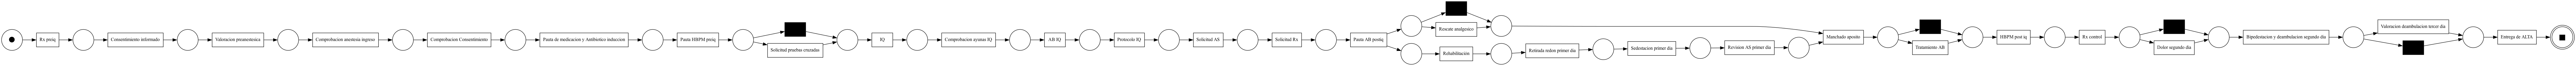

In [32]:
net_i_rodilla, im_i_rodilla, fm_i_rodilla = pm.discover_petri_net_inductive(event_log_rodilla, noise_threshold=0.25)
pm.view_petri_net(net_i_rodilla, im_i_rodilla, fm_i_rodilla)

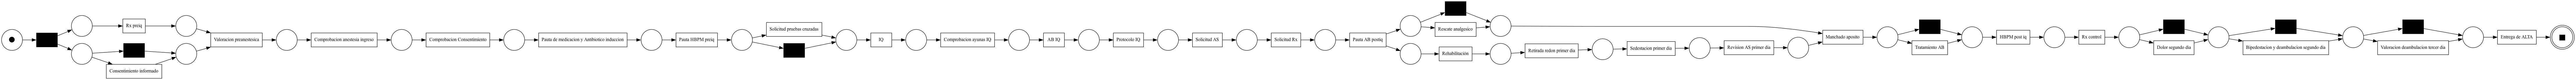

In [33]:
net_i_rodilla, im_i_rodilla, fm_i_rodilla = pm.discover_petri_net_inductive(event_log_rodilla, noise_threshold=0.2)
pm.view_petri_net(net_i_rodilla, im_i_rodilla, fm_i_rodilla)

In [34]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net_i_rodilla, im_i_rodilla, fm_i_rodilla, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=event_log_rodilla)
pn_visualizer.save(gviz, "rodilla.0.25.inductive.png")

/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[

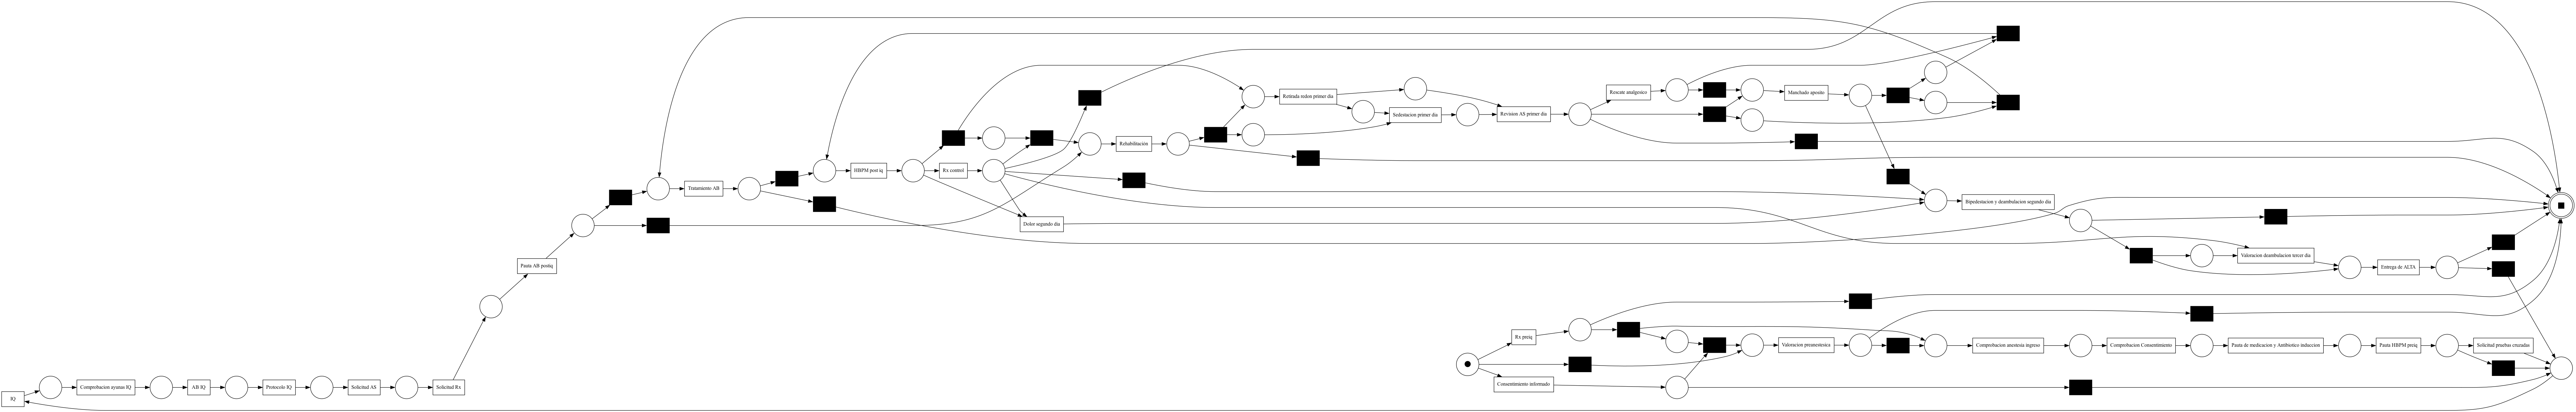

In [37]:
net_h, im_h, fm_h = pm.discover_petri_net_heuristics(event_log_rodilla, dependency_threshold= 0.7, and_threshold=0.75)
pm.view_petri_net(net_h, im_h, fm_h)